# Prática 3 - Inteligência Artificial


1. Variar parâmetros do problema
2. Resolver com Simulated Annealing
3. Resolver com PSO

---
**Nome**: Melissa Junqueira de Barros Lins

**RA**: 11201920583

---


In [ ]:
from random import shuffle, randrange

def cria_labirinto(larg = 8, alt = 3):
  vis = [[0] * larg + [1] for _ in range(alt)] + [[1] * (larg + 1)] 
  sem_muros = []

  def quebra_muros(lin, col):
    vis[lin][col] = 1
    d = [(lin, col + 1), (lin, col - 1), (lin - 1, col), (lin + 1, col)]
    shuffle(d)

    for (l, c) in d:
      if vis[l][c] != 1:
        sem_muros.append((lin, col, l, c))
        quebra_muros(l, c)

  quebra_muros(randrange(alt), randrange(larg))
  return(sem_muros)

def desenha_labirinto(lab, larg = 8, alt = 3):
  ver = [['|  '] * larg + ['|'] for _ in range(alt)] + [[]]
  hor = [['+--'] * larg + ['+'] for _ in range(alt + 1)]

  for (l1, c1, l2, c2) in lab:
    if l1 == l2:
      ver[l1][max(c1, c2)] = '   '
    if c1 == c2:
      hor[max(l1, l2)][c1] = '+  '

  for (a, b) in zip(hor, ver):
    print(''.join(a + ['\n'] + b))

+--+--+--+
|     |  |
+--+  +  +
|        |
+--+--+--+

 The best solution found:
 [0. 1. 0. 0. 0. 1. 0. 1. 1. 1.]

 Objective function:
 0


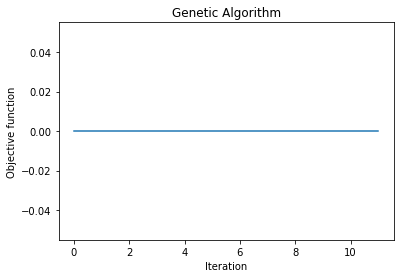

In [ ]:
!pip install geneticalgorithm
from geneticalgorithm import geneticalgorithm as ga
import numpy as np

larg = 3
alt = 2
inicio = (0, 0)
obj = (alt - 1, larg - 1)

sem_muros = cria_labirinto(larg, alt)
desenha_labirinto(sem_muros, larg, alt)

#Direções: (11, 00, 01, 10) -> (N, S, L, O)
#Exemplo:
#+--+--+--+
#| i      |
#+--+--+  +
#|       o|
#+--+--+--+
#Solução: 010100

#Exemplo:
#+--+--+--+
#| i      |
#+--+--+  +
#| o      |
#+--+--+--+
#Solução: 0101001010

sol_tam = (larg * alt - 1) * 2

def aptidao(solucao):
  def calc_vizinho(pos, direcao):
    if direcao == (1, 1):
      return(pos[0] - 1, pos[1])
    elif direcao == (0, 0):
      return(pos[0] + 1, pos[1])
    elif direcao == (0, 1):
      return(pos[0], pos[1] + 1)
    elif direcao == (1, 0):
      return(pos[0], pos[1] - 1)

  atual = inicio
  i = 0
  while i < (sol_tam - 1) and atual != obj:
    direcao = (solucao[i], solucao[i + 1])
    vizinho = calc_vizinho(atual, direcao)
    if atual + vizinho in sem_muros or vizinho + atual in sem_muros:
      atual = vizinho
    i += 2

  return(abs(atual[0] - obj[0]) + abs(atual[1] - obj[1]))

#Exemplo:
#+--+--+--+
#| i      |
#+  +--+  +
#|  |    o|
#+--+--+--+
#Aptidao([0,1,0,0,1,1,0,0,1,0]) = 3


#Documentação
"""
geneticalgorithm(function, dimension, variable_type='bool',  variable_boundaries=None, variable_type_mixed=None, function_timeout=10, 
algorithm_parameters={'max_num_iteration': None,'population_size':100, ' mutation_probability':0.1, 'elit_ratio': 0.01,
'crossover_probability': 0.5,'parents_portion': 0.3, 'crossover_type':'uniform',b'max_iteration_without_improv':None},
convergence_curve=True, progress_bar=True)
"""

parametros = {'max_num_iteration': 100,
 'population_size':50,
 'mutation_probability':0.01,
 'elit_ratio': 0.1,
 'crossover_probability': 0.5, 
 'parents_portion': 0.3, 
 'crossover_type':'one_point',
 'max_iteration_without_improv': 10}

exp = ga(aptidao, sol_tam, 'int', np.array([[0, 1]] * sol_tam), algorithm_parameters = parametros)

exp.run()

## Alterando os parâmetros


1. Altura: 2, Largura: 3, Número máximo de iterações: 50, Tamanho da população: 100
2. Altura: 2, Largura: 3, Número máximo de iterações: 200, Tamanho da população: 200
3. Altura: 5, Largura: 7, Número máximo de iterações: 50, Tamanho da população: 100
4. Altura: 5, Largura: 7, Número máximo de iterações: 200, Tamanho da população: 200



 The best solution found:
 [0. 1. 1. 1. 0. 0. 0. 1. 0. 1.]

 Objective function:
 0.0


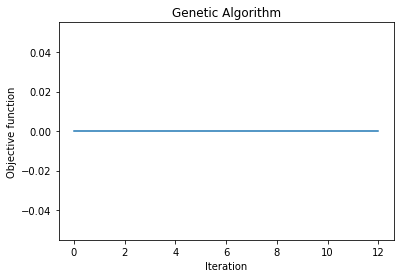


 The best solution found:
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]

 Objective function:
 0.0


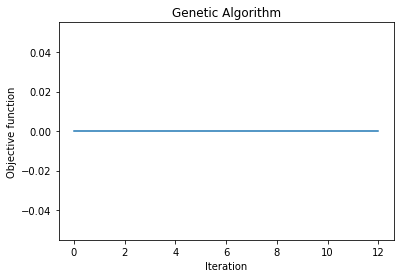


 The best solution found:
 [1. 1. 0. 1. 0. 0. 0. 1. 1. 1.]

 Objective function:
 0.0


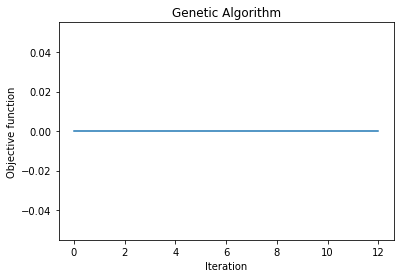


 The best solution found:
 [1. 0. 1. 1. 0. 1. 0. 0. 0. 1.]

 Objective function:
 0.0


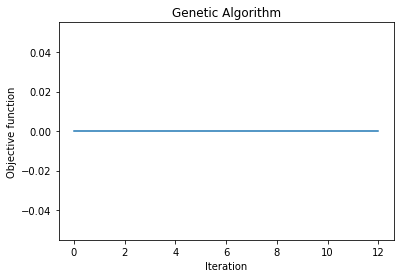

In [ ]:
# Teste 1
parametros = {'max_num_iteration': 50,
 'population_size':100,
 'mutation_probability':0.01,
 'elit_ratio': 0.1,
 'crossover_probability': 0.5, 
 'parents_portion': 0.3, 
 'crossover_type':'one_point',
 'max_iteration_without_improv': 10}

exp = ga(aptidao, sol_tam, 'int', np.array([[0, 1]] * sol_tam), algorithm_parameters = parametros)

exp.run()

# Teste 2
parametros = {'max_num_iteration': 200,
 'population_size':200,
 'mutation_probability':0.01,
 'elit_ratio': 0.1,
 'crossover_probability': 0.5, 
 'parents_portion': 0.3, 
 'crossover_type':'one_point',
 'max_iteration_without_improv': 10}

exp = ga(aptidao, sol_tam, 'int', np.array([[0, 1]] * sol_tam), algorithm_parameters = parametros)

exp.run()

# Teste 3
larg = 7
alt = 5

parametros = {'max_num_iteration': 50,
 'population_size':100,
 'mutation_probability':0.01,
 'elit_ratio': 0.1,
 'crossover_probability': 0.5, 
 'parents_portion': 0.3, 
 'crossover_type':'one_point',
 'max_iteration_without_improv': 10}

exp = ga(aptidao, sol_tam, 'int', np.array([[0, 1]] * sol_tam), algorithm_parameters = parametros)

exp.run()

# Teste 4
larg = 7
alt = 5
parametros = {'max_num_iteration': 200,
 'population_size':200,
 'mutation_probability':0.01,
 'elit_ratio': 0.1,
 'crossover_probability': 0.5, 
 'parents_portion': 0.3, 
 'crossover_type':'one_point',
 'max_iteration_without_improv': 10}

exp = ga(aptidao, sol_tam, 'int', np.array([[0, 1]] * sol_tam), algorithm_parameters = parametros)

exp.run()